## Chapter 5

# 5

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from IPython.display import display, HTML
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets
from scipy import stats
from sklearn.utils import resample

In [3]:
df = pd.read_excel('Default.xlsx',index_col=0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [4]:
# check for null values
#df.isna().sum()
df.isna().values.any()
df.head()
df = pd.get_dummies(df,prefix=['default','student'],drop_first=True)
df
#Student = pd.get_dummies(df['student'],drop_firsdt=True)
#df = pd.concat([df,Default,Student],axis=1)

,balance,income,default_Yes,student_Yes
1,729.526495,44361.625074,0,0
2,817.180407,12106.134700,0,1
3,1073.549164,31767.138947,0,0
4,529.250605,35704.493935,0,0
5,785.655883,38463.495879,0,0
...,...,...,...,...
9996,711.555020,52992.378914,0,0
9997,757.962918,19660.721768,0,0
9998,845.411989,58636.156984,0,0
9999,1569.009053,36669.112365,0,0


# (a) Fit a logistic regression model that uses income and balance to predict default

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [113]:
X = df.drop(['default_Yes'],axis=1)
y = df[['default_Yes']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [7]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
pred = logmodel.predict(X_test)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [10]:
print(confusion_matrix(pred,y_test))

[[3189  110]
 [   1    0]]


# Set different levels for the logistic regression

In [11]:
# Set different levels for the logistic regression
pred_proba_df = pd.DataFrame(logmodel.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(y_test,
                    Y_test_pred.iloc[:,1])
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.values.reshape(y_test.values.size,1),
                           Y_test_pred.iloc[:,1].values.reshape(Y_test_pred.iloc[:,1].values.size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.6618181818181819
[[2138 1052]
 [  64   46]]

******** For i = 0.1 ******
Our testing accuracy is 0.7696969696969697
[[2503  687]
 [  73   37]]

******** For i = 0.15 ******
Our testing accuracy is 0.8533333333333334
[[2786  404]
 [  80   30]]

******** For i = 0.2 ******
Our testing accuracy is 0.91
[[2985  205]
 [  92   18]]

******** For i = 0.25 ******
Our testing accuracy is 0.9372727272727273
[[3084  106]
 [ 101    9]]

******** For i = 0.3 ******
Our testing accuracy is 0.9545454545454546
[[3147   43]
 [ 107    3]]

******** For i = 0.35 ******
Our testing accuracy is 0.9609090909090909
[[3170   20]
 [ 109    1]]

******** For i = 0.4 ******
Our testing accuracy is 0.9633333333333334
[[3179   11]
 [ 110    0]]

******** For i = 0.45 ******
Our testing accuracy is 0.9654545454545455
[[3186    4]
 [ 110    0]]

******** For i = 0.5 ******
Our testing accuracy is 0.9663636363636363
[[3189    1]
 [ 110    0]]

******** For i = 0

In [12]:
pd.concat([pred_proba_df,Y_test_pred],axis=1)

,0,1,0,1
0,0.967900,0.032100,0,0
1,0.993963,0.006037,1,0
2,0.944396,0.055604,0,0
3,0.985310,0.014690,0,0
4,0.997077,0.002923,1,0
...,...,...,...,...
3295,0.997027,0.002973,1,0
3296,0.997078,0.002922,1,0
3297,0.991332,0.008668,1,0
3298,0.718004,0.281996,0,0


# b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:
    i. Split the sample set into a training set and a validation set.
    ii. Fit a multiple logistic regression model using only the training observations.
    iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.
    iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.
# (c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Com- ment on the results obtained.

In [13]:
from IPython.display import display, HTML
for s in range(1,4):
    display(HTML('<h3>Random seed = {}</h3>'.format(s)))
    # Create index for 50% holdout set
    X = df.drop(['default_Yes'],axis=1)
    y = df['default_Yes']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=(s*40))
    
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    
    pred = logmodel.predict(X_test)
    conf = confusion_matrix(pred,y_test)
    print(confusion_matrix(pred,y_test))
    print("Validation error: {}%".format((conf[0][1] + conf[1][0])/(conf[0][0]+conf[1][0]+conf[0][1]+conf[1][1])*100) )

[[4817  183]
 [   0    0]]
Validation error: 3.66%


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4836  163]
 [   1    0]]
Validation error: 3.2800000000000002%


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4830  168]
 [   2    0]]
Validation error: 3.4000000000000004%


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**(d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate**

In [82]:
def confusion_table(confusion_matrix):
    conf_matrix = pd.DataFrame({'y_pred=0': np.append(confusion_matrix[:,0],confusion_matrix.sum(axis=0)[0]),
                               'y_pred=1': np.append(confusion_matrix[:,1],confusion_matrix.sum(axis=0)[1]),
                                'Total': np.append(confusion_matrix.sum(axis=1),''),
                               '':['y=0','y=1','Total']}).set_index('')
    return conf_matrix

def error_rate(confusion_matrix):
    return np.around((1- (confusion_matrix.diagonal().sum()/confusion_matrix.sum()))*100,4) 

In [84]:
for i in range(1,4):
    display(HTML('<h3>Random seed = {}</h3>'.format(i)))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=(i*40))
    logit = LogisticRegression().fit(X_train,y_train)
    y_pred = logit.predict(X_test)
    display(confusion_table(confusion_matrix(y_test,y_pred)))
    display("Error rate: {}%".format(error_rate(confusion_matrix(y_test,y_pred))))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,y_pred=0,y_pred=1,Total
,,,
y=0,4817,0,4817
y=1,183,0,183
Total,5000,0,


'Error rate: 3.66%'

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,y_pred=0,y_pred=1,Total
,,,
y=0,4836,1,4837
y=1,163,0,163
Total,4999,1,


'Error rate: 3.28%'

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,y_pred=0,y_pred=1,Total
,,,
y=0,4830,2,4832
y=1,168,0,168
Total,4998,2,


'Error rate: 3.4%'

**It is difficult to discern if the student predictor has improved the model because of the variation in results.**

### 6. We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the Default data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the glm() function. Do not forget to set a random seed before beginning your analysis

**a) Using the summary() and glm() functions, determine the estimated standard errors for the coefficients associated with income and balance in a multiple logistic regression model that uses both predictors**

In [150]:
response = 'default_Yes'
predictors = ['income','balance']

X_all = sm.add_constant(np.array(df[predictors]))
y_all = np.array(df[response])

model = sm.Logit(y_all,X_all).fit()

print(model.summary())

stats_df = pd.DataFrame({'coef_sm':model.params,
                        'std': model.bse})
stats_df

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: inf
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 09 May 2020   Pseudo R-squ.:                     inf
Time:                        01:09:55   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
x1          2.081e-05   4.99e-06 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


,coef_sm,std
0,-11.540468,0.434772
1,0.000021,0.000005
2,0.005647,0.000227


**NOTE: Apparent bug in statsmodels.discrete.discrete_model.LogitResults.summary. Std error x2 is misrepresented in summary table, it is easy to misread this as lower than standard error for x1 when in fact it is not (see table above).**

### (b) Write a function, boot.fn(), that takes as input the Default data set as well as an index of the observations, and that outputs the coefficient estimates for income and balance in the multiple logistic regression model

In [163]:
def boot_fn(df,index):
    response='default_Yes'
    predictors = ['income','balance']

    X_all = sm.add_constant(np.array(df[predictors].loc[index]))
    y_all = np.array(df[response].loc[index])
    
    logit = sm.Logit(y_all,X_all).fit()
    
    return logit.params


    

**(c) Use the boot() function together with your boot.fn() function to estimate the standard errors of the logistic regression coefficients for income and balance**

In [168]:
default_df = pd.read_excel('Default.xlsx', index_col= 0)
default_df = default_df.reset_index().drop('index', axis=1)
default_df = pd.get_dummies(default_df, dtype=np.float64).drop(['default_No', 'student_No'], axis=1)

def boot_idx(n):
    return np.random.randint(low = 0,high=n,size=n)

def boot(zn,df,samples):
    results = []
    for i in range(samples):
        z = zn(df,boot_idx(df.shape[0]))
        results += [z]
    return np.array(results)

def standard_deviation(X):
    """Compute deviation error for jth element in matrix X
    equivalent to np.std(X, axis=0)"""
    X_bar = np.mean(X, axis=0)
    SE = np.sqrt((np.sum(np.square(X - X_bar), axis=0)) / (len(X)))
    return SE

B = 10
coef_preds    = boot(boot_fn,default_df, samples=B)
coef_pred     = np.mean(coef_preds, axis=0)
standard_errs = standard_deviation(coef_preds)

bootstrap_est = pd.DataFrame({'coef_boot': coef_pred, 'SE_boot': standard_errs})
display(bootstrap_est)



Optimization terminated successfully.
         Current function value: 0.073679
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078537
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.075390
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.077885
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.082526
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.071278
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.086816
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080131
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080354
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

,coef_boot,SE_boot
0,-11.640396,0.445420
1,0.000019,0.000003
2,0.005737,0.000214


**(d) Comment on the estimated standard errors obtained using the glm() function and using your bootstrap function**

In [169]:
results = pd.concat([bootstrap_est,stats_df],axis=1)
results

,coef_boot,SE_boot,coef_sm,std
0,-11.640396,0.445420,-11.540468,0.434772
1,0.000019,0.000003,0.000021,0.000005
2,0.005737,0.000214,0.005647,0.000227


**Note that the disparity is slightly more significant when fewer bootstrap samples are used. Here 10,000 were used, but the estimates were alike to within the same order of magnitude with only 10 bootstrap samples.**

### 7. In Sections 5.3.2 and 5.3.3, we saw that the cv.glm() function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just the glm() and predict.glm() functions, and a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the Weekly data set. Recall that in the context of classification problems, the LOOCV error is given in (5.4)

**(a) Fit a logistic regression model that predicts Direction using Lag1 and Lag2.**

In [202]:
weekly_df = pd.read_csv('Weekly.csv')
weekly_df = pd.get_dummies(weekly_df).drop(['Direction_Down'],axis=1)

response='Direction_Up'
predictors = ['Lag1','Lag2']

train = np.random.rand(len(weekly_df))<0.5

X_train = sm.add_constant(np.array(weekly_df[train][predictors]))
X_test = sm.add_constant(np.array(weekly_df[~train][predictors]))
y_train = np.array(weekly_df[train][response])
y_test = np.array(weekly_df[~train][response])

model = LogisticRegression().fit(X_train,y_train)

#predict
y_pred = model.predict(X_test)

# Analysis
display(confusion_table(confusion_matrix(y_test,y_pred)))
display(error_rate((confusion_matrix(y_test,y_pred))))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,y_pred=0,y_pred=1,Total
,,,
y=0,3,229,232
y=1,1,309,310
Total,4,538,


42.4354

**(b) Fit a logistic regression model that predicts Direction using Lag1 and Lag2 using all but the first observation.**

In [237]:
weekly_df = pd.read_csv('Weekly.csv')
weekly_df = pd.get_dummies(weekly_df).drop(['Direction_Down'],axis=1)

response='Direction_Up'
predictors = ['Lag1','Lag2']

train = weekly_df.index > 0

X_train = np.array(weekly_df[train][predictors])
X_test = np.array(weekly_df[~train][predictors])
y_train = np.array(weekly_df[train][response])
y_test = np.array(weekly_df[~train][response])

model = LogisticRegression(fit_intercept=True).fit(X_train,y_train)



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**(c) Use the model from (b) to predict the direction of the first observation. You can do this by predicting that the first observation will go up if P(Direction="Up"|Lag1, Lag2) > 0.5. Was this observation correctly classified?**

In [238]:
display(model.predict(X_test))

# Analysis
display(confusion_table(confusion_matrix(y_test,y_pred)))
display(error_rate((confusion_matrix(y_test,y_pred))))

array([1], dtype=uint8)

,y_pred=0,y_pred=1,Total
,,,
y=0,0,1,1
y=1,0,0,0
Total,0,1,


100.0

The observation was incorrectly classified.

**(d) Write a for loop from i=1 to i=n, where n is the number of observations in the data set, that performs each of the following steps:**
    
- i. Fit a logistic regression model using all but the ith observation to predict Direction using Lag1 and Lag2.
- ii. Compute the posterior probability of the market moving up for the ith observation.
- iii. Use the posterior probability for the ith observation in order to predict whether or not the market moves up.
- iv. Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0

In [242]:
y_pred = []
for i in range(weekly_df.shape[0]):
    train = weekly_df.index != i
    
    X_train = np.array(weekly_df[train][predictors])
    X_test = np.array(weekly_df[~train][predictors])
    y_train = np.array(weekly_df[train][response])
    y_test = np.array(weekly_df[~train][response])

    model = LogisticRegression(fit_intercept=True).fit(X_train,y_train)
    y_pred += [model.predict(X_test)]

y_pred = np.array(y_pred)
y_test = weekly_df[response]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

**(e) Take the average of the n numbers obtained in (d)iv in order to obtain the LOOCV estimate for the test error. Comment on the results**

In [250]:
# Analysis
confusion_mtx = confusion_matrix(y_test, y_pred)
display(confusion_table(confusion_mtx))

total_error_rate_pct = np.around(error_rate(confusion_mtx) , 4)
print('total_error_rate: {}%'.format(total_error_rate_pct))

,y_pred=0,y_pred=1,Total
,,,
y=0,34,450,484
y=1,40,565,605
Total,74,1015,


total_error_rate: 44.9954%


- LOOCV yields an estimated test error rate of 45.0%, higher than the 42% error rate observed with a 50% holdout set.

- The LOOCV approach allows the model to train on a 2x - 1 larger training set than 50% holdout, which could be significant if we were to experiment with more flexible models that require more observations to mitigate over-fitting.

- LOOCV also yields a 2x increase in the effective test set over 50% holdout.

- The above means that there is less bias in the training and test sets exposed to our model by LOOCV than for 50% holdout.

- This suggests that the lower error observed by 50% holdout is dues to increased bias in the datasets, or model overfitting.

- We expect the LOOCV result to exhibit higher variance than the hold-out approach, that is we expect to observe a different error score for some other sample of observations.

### 8. We will now perform cross-validation on a simulated data set.

**(a) Generate a simulated data set as follows:** 
> $set.seed(1)$

> $x=rnorm(100)$

> $y=x-2*x^2+rnorm(100)$
 
 In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

In [258]:
np.random.seed(1)
x= np.random.normal(0,1,100)
y = (x-2) *x*x + np.random.normal(0,1,100)

$y=(x−2)x^2+ϵ$

$y=x^3+(−2x^2)+ϵ$

$y=−2x^2+x^3+ϵ$

$y=β0+β1x^2+β2x^3+ϵ$

Where:
n=100
p=2
β0=0
β1=−2
β2=1

**b) Create a scatterplot of X against Y . Comment on what you find.**

Text(0, 0.5, 'y')

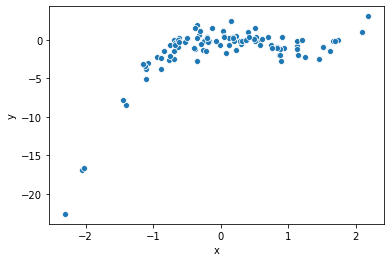

In [259]:
sns.scatterplot(x,y)
plt.xlabel('x')
plt.ylabel('y')

**(c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:** 

- i. $Y=β_0+β_1X+ϵ$
- ii. $Y=β_0+β_1X+β_2X^2+ϵ$
- iii. $Y=β_0+β_1X+β_2X^2+β_3X^3+ϵ$
- iv. $Y=β_0+β_1X+β_2X^2+β_3X^3+β_4X^4+ϵ$

In [286]:
def mse(y_pred, y):
    """Calculate mean squared error"""
    return np.sum(np.square(y_pred - y)) / y.size

def sim_loocv(seed):
    np.random.seed(seed)
    
    x  = np.random.normal(0, 1, 100)
    y = ((x-2) * (x**2)) + np.random.normal(0, 1, 100)
    sim_df = pd.DataFrame({'x': x, 'y': y})

    formulae = {'x': 'y ~ x',
          'x_2': 'y ~ x + np.power(x,2)',
          'x_3': 'y ~ x + np.power(x,2) + np.power(x,3)',
          'x_4': 'y~x + np.power(x,2) + np.power(x,3) + np.power(x,4)'}
    
    error= {}
    
    for f in formulae:
        y_pred = pd.Series({})
        for i in range(sim_df.shape[0]):
            train = sim_df.index != i

            model = smf.ols(formula=formulae[f],data=sim_df[train]).fit()
            y_hat = model.predict(sim_df[~train])
            y_pred = pd.concat([y_pred,y_hat])
        error[f] = mean_squared_error(y,np.array(y_pred))
        
    display(HTML('<h3>MSE</h3>'))
    display(error)
        

In [287]:
sim_loocv(1)

{'x': 9.710113037214064,
 'x_2': 4.16996357963943,
 'x_3': 0.926876878164881,
 'x_4': 0.8669116865881079}

**(d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?**

In [288]:
sim_loocv(909)

{'x': 46.75100766817209,
 'x_2': 30.966123082063127,
 'x_3': 1.0208103012691945,
 'x_4': 1.3948633877139363}

- Changing the random seed that is used to simulate the observations has a large effect on the observed mean squared error.

- By changing the random seed we have changed the sample of observations taken from the population, so this change in error is due to variance in our sample. In this case the sample size is small n=100, and so we might expect quite high variance between succesive samples. This would lead to variability between the mse errors observed for different samples of X, Y.

**(e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.**

- In test c), model iv with an x4 term exhibited the lowest error, marginally lower than model iii which also performed well. I expected the lowest error to be observed for model iii) because this is simulated data and we know the true function f(x) in this case is a 3rd order polynomial.

- Interestingly, the second test with a different seed yields the expected result – lowest error for x^3 model.

**(f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?**

In [292]:
np.random.seed(1)
    
x  = np.random.normal(0, 1, 100)
y = ((x-2) * (x**2)) + np.random.normal(0, 1, 100)
sim_df = pd.DataFrame({'x': x, 'y': y})

formulae = {'x': 'y ~ x',
          'x_2': 'y ~ x + np.power(x,2)',
          'x_3': 'y ~ x + np.power(x,2) + np.power(x,3)',
          'x_4': 'y~x + np.power(x,2) + np.power(x,3) + np.power(x,4)'}
    
error= {}
    
for f in formulae:
    y_pred = pd.Series({})
    for i in range(sim_df.shape[0]):
        train = sim_df.index != i

        model = smf.ols(formula=formulae[f],data=sim_df[train]).fit()
        
    display(model.summary())
    display(model.pvalues[model.pvalues<0.05].sort_values())
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     42.70
Date:                Sat, 09 May 2020   Prob (F-statistic):           2.97e-09
Time:                        20:18:16   Log-Likelihood:                -248.15
No. Observations:                  99   AIC:                             500.3
Df Residuals:                      97   BIC:                             505.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4193      0.302     -4.702      0.000      -2.018      -0.820
x              2.2187      0.340      6.534      0.000       1.545       2.893
==============================================================================
Omnibus:                       77.331   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              502.293
Skew:                          -2.567   Prob(JB):                    8.48e-110
Kurtosis:                      12.767   Cond. No.                         1.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

x            2.967156e-09
Intercept    8.524054e-06
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     135.0
Date:                Sat, 09 May 2020   Prob (F-statistic):           1.27e-28
Time:                        20:18:17   Log-Likelihood:                -199.97
No. Observations:                  99   AIC:                             405.9
Df Residuals:                      96   BIC:                             413.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2293      0.228      1.006      0.317      -0.223       0.682
x                  2.4717      0.211     11.728      0.000       2.053       2.890
np.power(x, 2)    -2.1036      0.167    -12.574      0.000      -2.436      -1.771
==============================================================================
Omnibus:                       13.623   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.708
Skew:                           0.425   Prob(JB):                     2.15e-07
Kurtosis:                       5.593   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

np.power(x, 2)    5.222908e-22
x                 3.075979e-20
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     442.1
Date:                Sat, 09 May 2020   Prob (F-statistic):           1.17e-55
Time:                        20:18:18   Log-Likelihood:                -132.28
No. Observations:                  99   AIC:                             272.6
Df Residuals:                      95   BIC:                             282.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1160      0.116      1.001      0.319      -0.114       0.346
x                 -0.1165      0.189     -0.618      0.538      -0.491       0.258
np.power(x, 2)    -1.9716      0.085    -23.127      0.000      -2.141      -1.802
np.power(x, 3)     1.0850      0.065     16.669      0.000       0.956       1.214
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.022
Skew:                          -0.222   Prob(JB):                        0.600
Kurtosis:                       3.223   Cond. No.                         5.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

np.power(x, 2)    8.414181e-41
np.power(x, 3)    5.858344e-30
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     350.8
Date:                Sat, 09 May 2020   Prob (F-statistic):           1.42e-55
Time:                        20:18:20   Log-Likelihood:                -129.19
No. Observations:                  99   AIC:                             268.4
Df Residuals:                      94   BIC:                             281.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3031      0.136      2.227      0.028       0.033       0.573
x                 -0.1113      0.184     -0.606      0.546      -0.476       0.253
np.power(x, 2)    -2.5461      0.248    -10.281      0.000      -3.038      -2.054
np.power(x, 3)     1.1059      0.064     17.283      0.000       0.979       1.233
np.power(x, 4)     0.1407      0.057      2.462      0.016       0.027       0.254
==============================================================================
Omnibus:                        1.519   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                1.037
Skew:                          -0.225   Prob(JB):                        0.595
Kurtosis:                       3.221   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

np.power(x, 3)    6.145045e-31
np.power(x, 2)    4.647858e-17
np.power(x, 4)    1.563036e-02
Intercept         2.832026e-02
dtype: float64

### 9. We will now consider the Boston housing data set, from the MASS library.

In [293]:
boston = datasets.load_boston()
boston_feat = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_resp = pd.Series(boston.target).rename('medv')

boston_df = pd.concat([boston_feat, boston_resp], axis=1)

# Check for missing values
#assert boston_df.isnull().sum().sum() == 0

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**(a) Based on this data set, provide an estimate for the population mean of medv. Call this estimate μˆ.**

In [317]:
u_hat = boston_df['medv'].mean()
u_hat

22.532806324110698

**(b) Provide an estimate of the standard error of μˆ. Interpret this result.**

- Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.

In [301]:
std = (np.sqrt(np.sum((boston_df['medv']-u_hat)**2)/ boston_df.shape[0]))/np.sqrt(len(boston_df))
std

0.4084569346972866

**(c) Now estimate the standard error of μˆ using the bootstrap. How does this compare to your answer from (b)?**

In [313]:
def boot_mean(df):
    return df.mean()

def choose_sample(num):
    return np.random.randint(low=0,high=num,size=num)
    
def boot_fn(df,sample):
    results = []
    for i in range(sample):
        bootstrap_indices = choose_sample(df.shape[0])
        z = boot_mean(df[bootstrap_indices])
        results += [z]
    return np.array(results)

B = 10000

mean_boot  = boot_fn(boston_df['medv'], sample=B)
SE_pred    = np.std(mean_boot) 

print('SE: ' + str(SE_pred))
    

SE: 0.40712404057985163


- The bootstrap method gives a remarkably good estimate of the standard error, when compared to the same estimate derived analytically. The bootstrap approach is computationally more expensive, but has the advantage that no analytic derivation of the standard error for the statistic is required, making it much more general for application to other statistics.

**d) Based on your bootstrap estimate from (c), provide a 95 % confidence interval for the mean of medv. Compare it to the results obtained using** 

- Hint: You can approximate a 95% confidence interval using the formula [μˆ − 2SE(μˆ), μˆ + 2SE(μˆ)].**

In [320]:
conf_low = u_hat - 2*SE_pred
conf_high = u_hat + 2*SE_pred

show = pd.Series({'u':u_hat,
                  'se':SE_pred,
                 'conf_low':conf_low,
                 'conf_high':conf_high})
show

u            22.532806
se            0.407124
conf_low     21.718558
conf_high    23.347054
dtype: float64

**e) Based on this dataset, provide an estimate, μˆmed, for the median value of medv in the population.**

In [321]:
u_med = boston_df['medv'].median()
display(u_med)

21.2

**f) We now would like to estimate the standard error of μˆmed. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.**

In [327]:
def boot_median(df):
    return df.median()

def choose_sample(num):
    return np.random.randint(low=0,high=num,size=num)
    
def boot_fn(df,sample):
    results = []
    for i in range(sample):
        bootstrap_indices = choose_sample(df.shape[0])
        z = boot_median(df[bootstrap_indices])
        results += [z]
    return np.array(results)

B = 10000

median_boot  = boot_fn(boston_df['medv'], sample=B)
SE_pred    = np.std(median_boot) 

print('SE: ' + str(SE_pred))

SE: 0.3780640156111128


The estimated standard error for the median value of medv is similar to the estimated standard error for the mean, which is not suprising we would expect the precision of median and and mean to be related.

**g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston suburbs. Call this quantity μˆ0.1. (You can use the quantile() function.)**

In [324]:
tenth_percentile = np.percentile(boston_df['medv'], 10)
print('tenth_percentile: ' + str(tenth_percentile))

tenth_percentile: 12.75


**h) Use the bootstrap to estimate the standard error of μˆ0.1. Comment on your findings.**

In [328]:
def boot_10_percentile(df):
    return np.percentile(df,10)

def choose_sample(num):
    return np.random.randint(low=0,high=num,size=num)
    
def boot_fn(df,sample):
    results = []
    for i in range(sample):
        bootstrap_indices = choose_sample(df.shape[0])
        z = boot_10_percentile(df[bootstrap_indices])
        results += [z]
    return np.array(results)

B = 10000

percentile_boot  = boot_fn(boston_df['medv'], sample=B)
SE_pred    = np.std(percentile_boot) 

print('SE: ' + str(SE_pred))

SE: 0.5087912538556456


We observe a standard error for the tenth percentile of 0.5. This error is similar to that observed for median and mean, which we would expect as these stats are related, for example a bootstrap sample with higher mean would likely exhibit a higher tenth percentile as the distribution shifts.